# Introduction
- Lemma
    - 형태소 분석, 어근 추출
- Stem
    - 어간 추출
- 형태소 분석 : 토큰 분리, 어간 추출, 품사 부착, 색인, 벡터화
- 구문 분석 : 문장 경계 인식, 구문분석, 공기어, 개체명 사전 구축(PLOT, 수치, 외국어 한글 표기), 개체명 인식
- 의미 분석 : 대용어 해소(대명사, 두문자어, 약어, 수치), 의미 중의성 해결(동명이인, 이명동인)
- 담론 분석 : 분류, 군집, 중복, 요약, 가중치, 순위화, 토픽 모델링, 이슈 트래킹, 평판분석, 감성분석, 복합논증분석

- 문장 : 완결된 내요을 나타내는 최소 단위
- 어절 : 문장을 구성하는 단위
- 단어 : 어절을 구성하는 요소. stemming한 결과. 한국어는 힘들다... 한 어절이 한 단어가 아니기 때문
- 형태소 : 의미를 가진 문법의 최소 단위. 단어로 나누기 어렵기 때문에 형태소에서 시작한다.
> 한국어는 기본적으로 형태소 기반으로 나눠야 하기 때문에 feature의 수가 많아서 어렵다.  

- 형태소와 단어
    - 단어 : 뜻을 지니고 홀로 쓰일 수 있는 말
    - 형태소 : 뜻을 가진 가장 작은 말
        - 자립성에 따라
            - 자립 형태소
            - 의존 형태소
        - 의미에 따라
            - 실질 형태소
            - 형식 형태소
            
> 자립 형태소이면서 실질 형태소는 대부분 명사. 명사만 나열해도 의미가 어느정도 전달된다

# KoNLPy, NLTK
## Tokenizing

In [5]:
import nltk
from nltk.tokenize import sent_tokenize

In [6]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skarn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### DB에서 데이터 가져오기

In [7]:
import sqlite3

In [9]:
conn = sqlite3.connect('../data_processing/unstructuredData/news.db')
cur = conn.cursor()

In [20]:
cur.execute('''
    SELECT content
    FROM table2
    ORDER BY id ASC
''')
corpus = [_[0] for _ in cur.fetchall()]

In [22]:
len(corpus[0]), len(corpus[0].split()), len(
    corpus[0].splitlines())  # 문자 수, 어절 수, 개행 단위 수

(2115, 481, 37)

In [24]:
len(sent_tokenize(corpus[0]))

24

In [25]:
corpus[0].splitlines()[0]  # 개행 단위로 짜르면 문장이 끝난게 아니기 때문에 좋지 않다.

'"2005년 민관위 조사서'

In [27]:
sent_tokenize(corpus[0])[0]  # 문장의 구성 성분에 맞게 문장 단위로 tokenize 한다.

'"2005년 민관위 조사서\n불법행위 청구권소멸\n결론 낸 적 없어" 반박\n\n"日과 타협여지 줄여\n논란키울 소지" 비판도\n\n◆ 한일 정면충돌 ◆\n\n강경화 외교부 장관(오른쪽)이 17일 오후 서울 종로 외교부 청사를 방문한 데이비드 스틸웰 신임 미국 국무부 동아태 차관보와 악수하고 있다.'

In [39]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
sent_tokenize('''
    Life is too short, Life is too short!! 
    Life is too short
    ''')

['\n    Life is too short, Life is too short!!', 'Life is too short']

In [44]:
sent_tokenize('''
    수업듣기 싫다~. 수업듣기 싫다!
    수업듣기 싫다....
    ''')

['\n    수업듣기 싫다~.', '수업듣기 싫다!', '수업듣기 싫다....']

In [45]:
from nltk.tokenize import word_tokenize
# 어절 단위로 자른다, split()보다 낫다
word_tokenize('Life is too short, Life is too short.')

['Life', 'is', 'too', 'short', ',', 'Life', 'is', 'too', 'short', '.']

In [47]:
len(corpus[0]), len(corpus[0].split()), len(
    corpus[0].splitlines())  # 문자 수, 어절 수, 개행 단위 수

(2115, 481, 37)

In [49]:
# string split과 tokenize는 다르다.
# 찾아낸 어절 수는 늘고, 문장 수는 적어진다.
len(word_tokenize(corpus[0])), len(sent_tokenize(corpus[0]))

(551, 24)

In [52]:
from nltk.tokenize import TweetTokenizer
word_tokenize("You need python =)")

['You', 'need', 'python', '=', ')']

In [55]:
TweetTokenizer().tokenize("You need python =)")

['You', 'need', 'python', '=)']

In [56]:
import re
from nltk.tokenize import regexp_tokenize

In [59]:
pattern = re.compile(r"\b([가-힣]+)\b")
regexp_tokenize("ㅠㅠ ㅜㅜ ㅋㅋ 한#%@글", pattern)

['한', '글']

In [62]:
re.sub(r"\b([^가-힣]+)\b", "", "ㅠㅠ ㅜㅜ ㅋㅋ 한#%@글")

# Q. 한글에서 몇부터 몇까지의 기준은 아스키 코드값 기준인가요?

'한글'

In [63]:
from nltk import Text
text = Text(word_tokenize(corpus[0]))

In [66]:
# B : unique , N : 전체 개수
text.vocab().B(), text.vocab().N()

(389, 551)

In [67]:
text.vocab().most_common(30)  # 상위 30개 단어

[('.', 23),
 ("''", 10),
 ('``', 8),
 ('입장을', 7),
 ('고', 7),
 ('당시', 7),
 ('강제징용', 6),
 ('있다', 5),
 ('2005년', 4),
 ('청와대가', 4),
 ('손해배상청구권이', 4),
 ('남아', 4),
 ('일본', 4),
 ('명확하게', 4),
 (',', 4),
 ("'", 4),
 ('이', 3),
 ('[', 3),
 (']', 3),
 ('피해자', 3),
 ('개인의', 3),
 ('정부가', 3),
 ('수', 3),
 ('것은', 3),
 ('대해서는', 3),
 ('관련', 3),
 ('밝혔다', 3),
 ('대변인은', 3),
 ('바', 3),
 ('것으로', 3)]

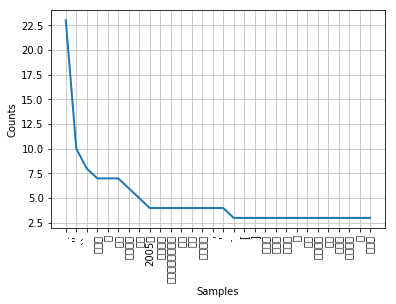

In [73]:
text.plot(30)  #

# Empirical Law
- 구두점, a, the 등 의미없는 토큰을 해결해야 한다.
- ambiguous, entrophy 가 높다

## Zipf's Law
- 워드의 랭킹에 반비례를 따른다.

In [74]:
text.vocab().freq('고')

0.012704174228675136

In [77]:
ratio = 0.0
for _ in [_[0] for _ in text.vocab().most_common(10)]:
    ratio += text.vocab().freq(_)
    print(text.vocab().freq(_))
print(ratio)  # 500개 단어 중 0.14%는 10개의 단어로 채워진다.

0.041742286751361164
0.018148820326678767
0.014519056261343012
0.012704174228675136
0.012704174228675136
0.012704174228675136
0.010889292196007259
0.009074410163339383
0.007259528130671506
0.007259528130671506
0.14700544464609802


In [78]:
import matplotlib.pyplot as plt

In [82]:
text.vocab()

FreqDist({'.': 23, "''": 10, '``': 8, '입장을': 7, '고': 7, '당시': 7, '강제징용': 6, '있다': 5, '2005년': 4, '청와대가': 4, ...})

In [101]:
### 모든 기사 합쳐봐라 ##
text = Text(word_tokenize(' '.join(corpus)))  # 35개 기사 합친다.

8955


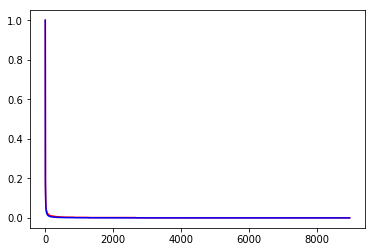

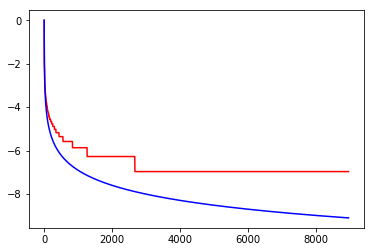

In [120]:
# from math import log
# %matplotlib inline
token = [_[0]
         for _ in sorted(text.vocab().items(), key=lambda x:x[1], reverse=True)]
print(len(token))
freq = [_[1]/text.vocab().most_common(1)[0][1]
        for _ in sorted(text.vocab().items(), key=lambda x:x[1], reverse=True)]
_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]
plt.plot([i for i in range(len(token))], freq, 'r-')
plt.plot([i for i in range(len(token))], rank, 'b-')
plt.show()
plt.plot([i for i in range(len(token))], _freq, 'r-')
plt.plot([i for i in range(len(token))], _rank, 'b-')
plt.show()

In [115]:
print(len(text.vocab()))
ratio = 0.0
for _ in [_[0] for _ in text.vocab().most_common(20)]:
    ratio += text.vocab().freq(_)
    print(text.vocab().freq(_))
print(ratio)  # 8955개 단어 중 0.14%는 10개의 단어로 채워진다.

8955
0.05053824902353053
0.017766981042202534
0.011527102981804324
0.011336572354005906
0.008049919024483185
0.00800228636753358
0.006335143374297418
0.006239878060398209
0.005906449461750976
0.005763551490902162
0.005715918833952558
0.005668286177002953
0.005001428979708488
0.004334571782414023
0.0036200819281699535
0.0034771839573211395
0.0033342859864723255
0.003239020672573116
0.003143755358673907
0.002810326760026674
0.17181099361722396


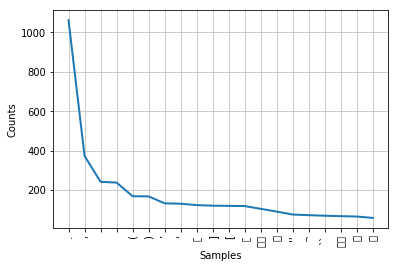

In [118]:
text.vocab()
text.plot(20)

In [126]:
K = 10  # 10 - 100
B = 0.4  # 0.4 - 0.6
unique = list()
total = list()
heaps = list()
largeText = ""
for _ in corpus:
    largeText += _
    text = Text(largeText)
    unique.append(text.vocab().B())
    total.append(text.vocab().N())
    heaps.append(K*text.vocab().N()**B)

<function matplotlib.pyplot.show(*args, **kw)>

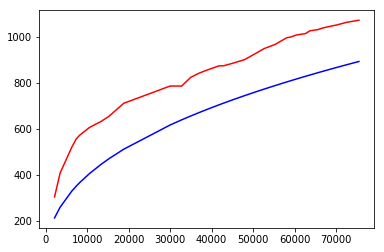

In [127]:
plt.plot(total, unique, 'r-')
plt.plot(total, heaps, 'b-')
plt.show

# N-gram 

In [150]:
sentence = "Life is too short, You need Python"


def eojeol(sentence, N=2):
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        #         ngram.append("".join(tokens[i:i+N]))
        ngram.append(tuple(tokens[i:i+N]))
    return ngram

def umjeol(token, N=2):
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append("".join(tokens[i:i+N]))
#         ngram.append(tuple(tokens[i:i+N]))
    return ngram
eojeol(sentence, 4)
umjeol(corpus[0].splitlines()[0])

['"2', '20', '00', '05', '5년', '년 ', ' 민', '민관', '관위', '위 ', ' 조', '조사', '사서']

In [133]:
from collections import defaultdict

freq = defaultdict(int)

for _ in eojeol(corpus[0]):
    freq[_] += 1

In [135]:
sorted(freq.items(), key=lambda x: x[1], reverse=True)[:10]# 제일 많이 나타난 쌍 상위 10개

[(("''", '고'), 5),
 (('있다', '.'), 4),
 (('강제징용', '피해자'), 3),
 (('개인의', '손해배상청구권이'), 3),
 (('.', '['), 2),
 (('피해자', '개인의'), 2),
 (('손해배상청구권이', '남아'), 2),
 (('지난해', '10월'), 2),
 (('강제징용', '판결'), 2),
 (('3권', '분립'), 2)]

In [141]:
freq[("''", '고')] / sum(freq.values()) * freq[('있다', '.')] / freq[("''", '고')]

0.007272727272727273

In [153]:
freq[("''", '고')] / sum(freq.values())

0.00909090909090909

# WPM
- **Word Piece Model**
- 하나의 단어를 내부 단어(Subword Unit)들로 분리하는 단어 분리 모델

`BPM` 로부터 파생되엇다.
- **Byte Pair Enoding**
- simple form of data compression


In [154]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skarn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## 불용어 처리

In [157]:
from nltk.corpus import stopwords
print(stopwords.open('english').read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



In [227]:
# tokens = {
#     "l o w </w>" : 5,
#     "l o w e s t </w>" : 2,
#     "n e w e r </w>" : 6,
#     "r i d e r </w>" : 3
# }
# K = max(tokens.values())

tokens = {
    "아 버 지 가 </w>" : 5,
    "아 버 지 께 서 </w>" : 2,
    "아 버 지 를 </w>" : 6,
    "아 버 지 에 게 </w>" : 3
}
K = max(tokens.values())

In [179]:
def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables = token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] += freq
    return ngram

In [223]:
def mergeMaxkey(ngram, tokens, K):
    maxKey = max(ngram, key=ngram.get)
    maxValue = max(ngram.values())
    newTokens = dict()
    for token, freq in tokens.items():
            newTokens[re.sub(' '.join(maxKey), ''.join(maxKey), token) if maxValue > K else token] = freq
#     print(maxKey)
    return newTokens

In [231]:
for _ in range(100): ## iteration 을 많이 할수록 합쳐진다.
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens, K)
maxKey, tokens

(defaultdict(int,
             {('아버지', '가'): 5,
              ('가', '</w>'): 5,
              ('아버지', '께'): 2,
              ('께', '서'): 2,
              ('서', '</w>'): 2,
              ('아버지', '를'): 6,
              ('를', '</w>'): 6,
              ('아버지', '에'): 3,
              ('에', '게'): 3,
              ('게', '</w>'): 3}),
 {'아버지 가 </w>': 5, '아버지 께 서 </w>': 2, '아버지 를 </w>': 6, '아버지 에 게 </w>': 3})

In [230]:
# pattern = r"[A-Za-z\/\<\>]{2,}"
pattern = r"[가-힣A-Za-z\/\<\>]{2,}"
result = list()
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _) if _ != r"</w>"])
set(result) # 찾아낸 `어간`들

{'아버지'}